# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. 

The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

Some information about dataset attributes from the Kaggle Dataset [link](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset): 

* **Pregnancies**: To express the Number of pregnancies
* **Glucose**: To express the Glucose level in blood
* **BloodPressure**: To express the Blood pressure measurement
* **SkinThickness**: To express the thickness of the skin
* **Insulin**: To express the Insulin level in blood
* **BMI**: To express the Body mass index
* **DiabetesPedigreeFunction**: To express the Diabetes percentage
* **Age**: To express the age
* **Outcome**: To express the final result 1 is Yes and 0 is No

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

---

Our goal of the Exploratory Data Analysis is to explore the data and the target variable, to gain understanding about the provided diabetes datasets by using visualizations and summary statistics. 

In [1]:
# Import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_theme()

In [2]:
# Load the dataset and save in 'diabetes_df'
diabetes_df = pd.read_csv(r'diabetes.csv')

# Load the first 5 rows of the dataframe
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


As the dataset is used for diagnostically predicting whether a patient has diabetes, the target variable is the 'Outcome' column that takes in a binary classification values of 0 - having no diabetes and 1 - having diabetes. The predictor variables are other diagnostic measurements including: 'Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age'.

In [3]:
# The dimensions of the dataframe - Number of rows and columns
diabetes_df.shape

(768, 9)

In [4]:
# Print information about the 'diabetes_df' DataFrame
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Statistics summary
diabetes_df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Before further analysing the dataset, I've found an excerpt from the Kaggle dataset link that we got the data from: *"Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. From the data set in the (.csv) file, we can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome)."*

The context of the medical predictor variables and the target variables are from females at least 21 years old from the Pima Indian heritage.

Based on that, we have some observations from the statistical summary table:

* **Pregnancies**: The highest number of pregnancies is 17, which is possible but on the higher side. It might be possible given the data is from a tribal adults females study.
* **Glucose, BloodPressure and SkinThickness**: The minimum value is 0 which is a concern, because that's not biologically possible. There might be data missing or erroneous data.
* **Insulin**: The minimum value of 0 for insulin is not typical. This probably came from an Insulin in blood test - a low insulin level is really a serious condition already [(Source)](https://medlineplus.gov/lab-tests/insulin-in-blood/). Additionally, the maximum value is 846 which seems very high. These values indicate potential missing, erroneous, or extreme data points.
* **BMI**: Again, a BMI of 0 is not feasible and suggests missing or erroneous data.

### 1. Are there any missing values in the dataset?

In [6]:
# There's no missing values
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 2. What is the distribution of each predictor variable?

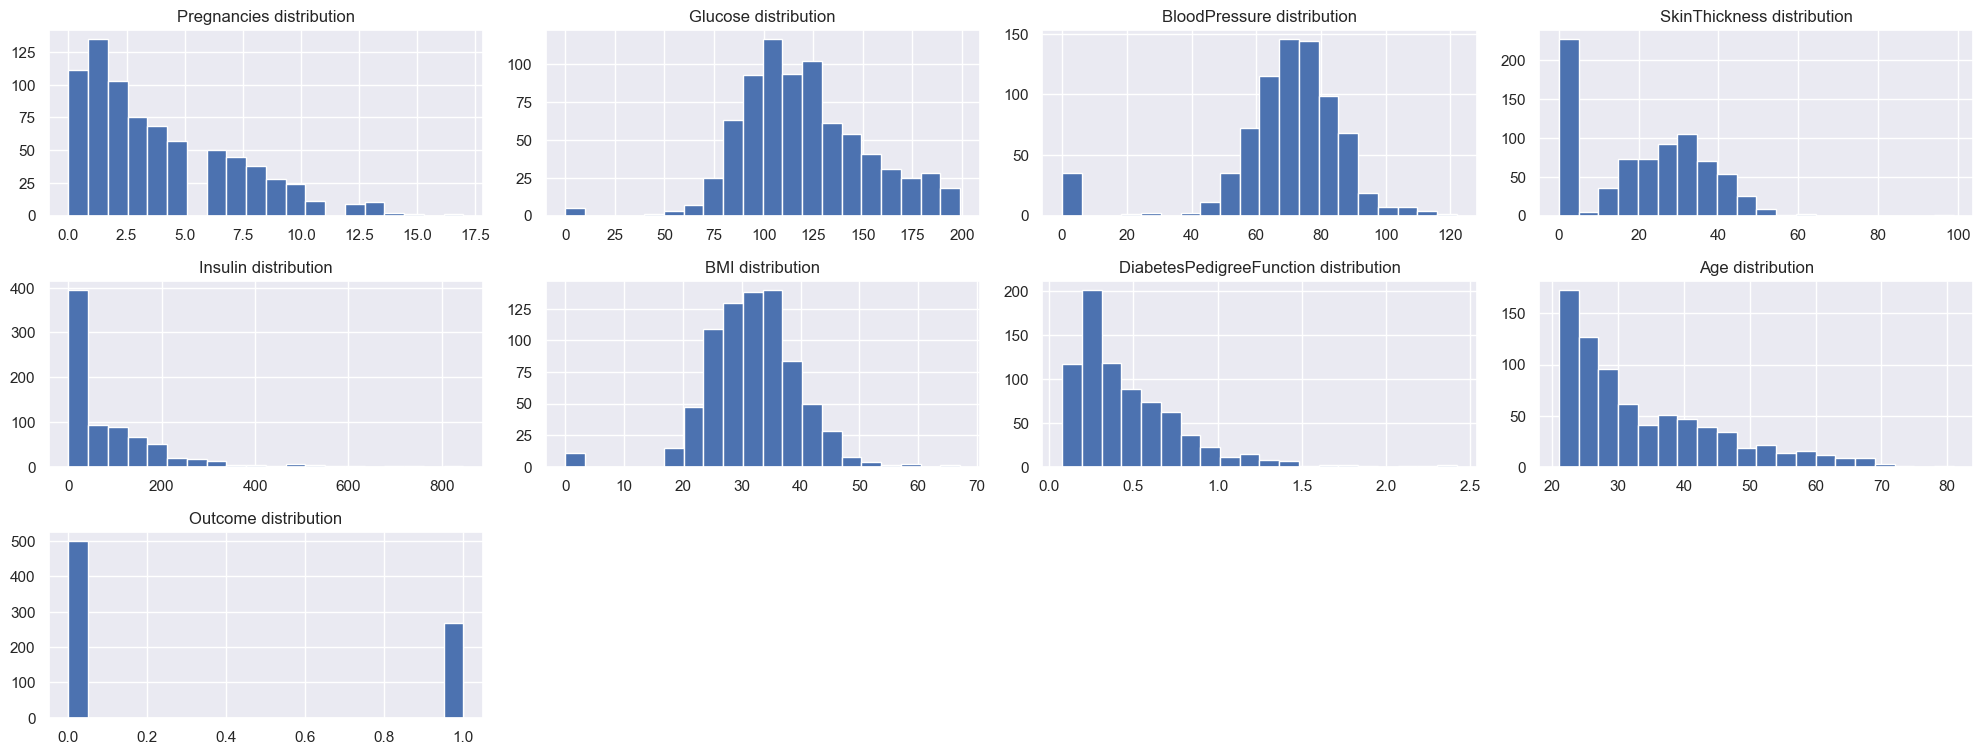

In [7]:
# Plot the histograms for all columns
def draw_histograms(dataframe, features, rows, cols):
    
    fig = plt.figure(figsize=(20,20))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax)
        ax.set_title(feature+' distribution')
    
    fig.tight_layout()
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.show()

draw_histograms(diabetes_df, diabetes_df.columns, 8, 4)

At a first glance from the histogram:

* The distributions of 'Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age' look skewed to the right.
* The significant presence of 0 in the 'Glucose, BloodPressure, SkinThickness, Insulin' and 'BMI' columns as we discussed that can potentially disrupt the data. We might consider removing them or imputing an appropriate value in the latter steps.
* Outliers (and the 0 avlues) are visible across the columns, except for 'Outcome'.
* 'BloodPressure' seem to have a normal distribution or other close-to-normal-distributions in 'SkinThickness' and 'BMI' - if we take out the zeros and outliers.
* The spreads of columms such as 'Pregnancies', 'Insulin' or 'Age' from their means are very large which might be a problem of these variables having more importance if we run a predicting model. Data transformation is necessary in this case.

### 3. Are there any outliers in the predictor variables?

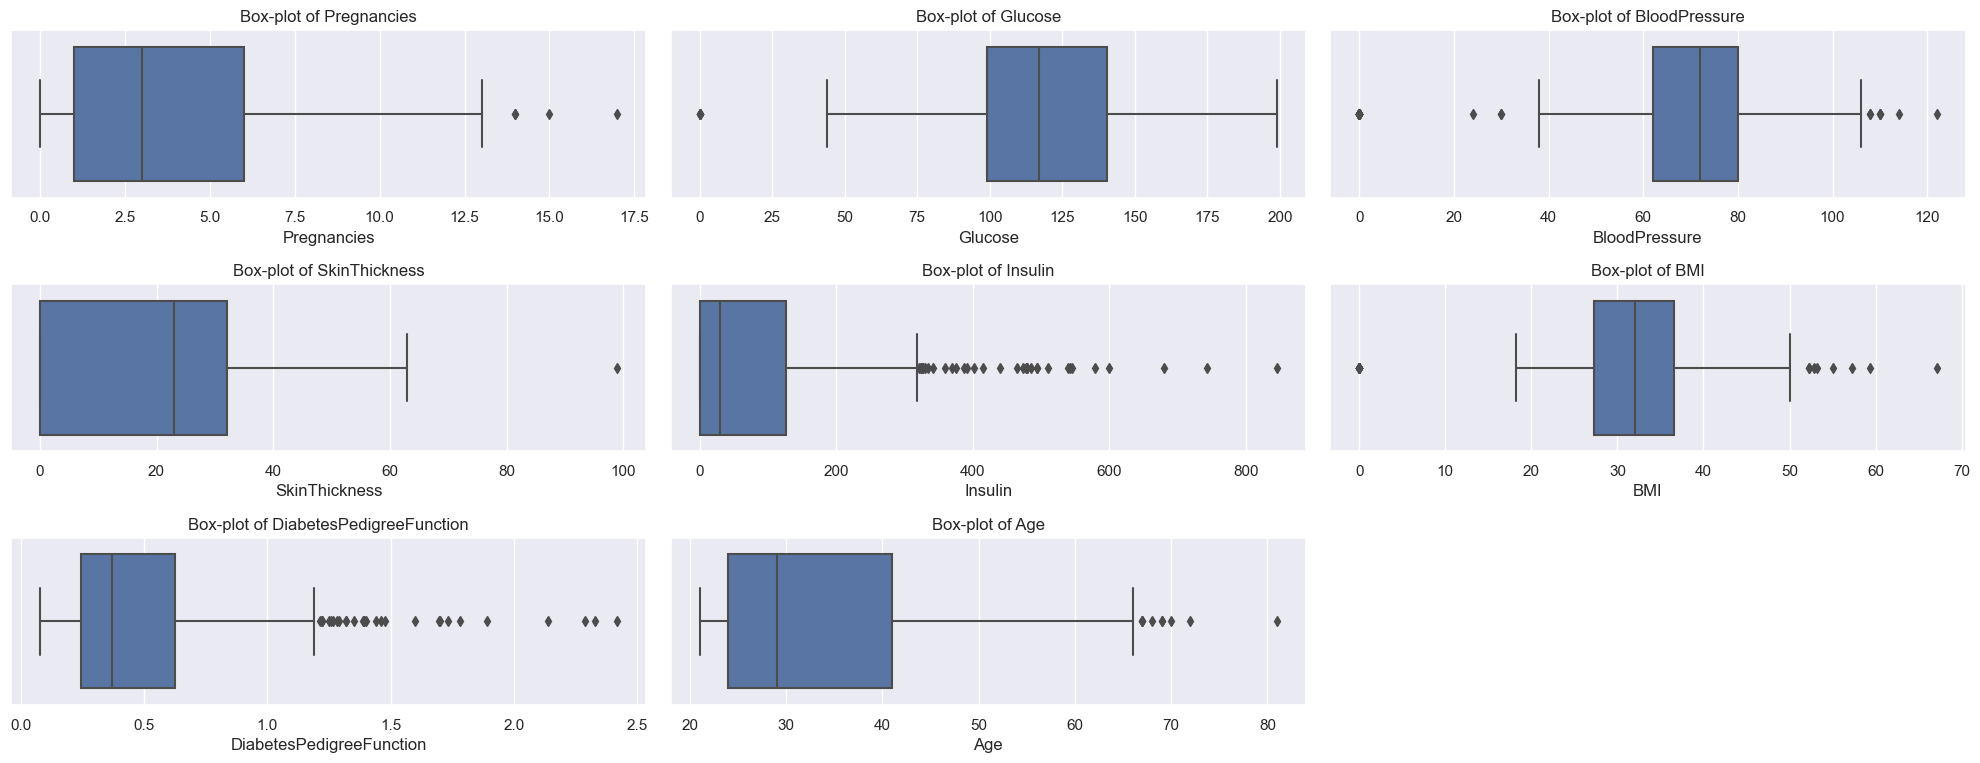

In [8]:
# Plot the boxplots for all columns, except for 'Outcome', to dectect outliers
def draw_boxplot(dataframe, features, rows, cols):
    
    fig = plt.figure(figsize=(20,20))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        sns.boxplot(data=diabetes_df, x=dataframe[feature])
        ax.set_title('Box-plot of '+ feature)
    
    fig.tight_layout()
    plt.show()

# Exclude the 'Outcome' column from the columns list
draw_boxplot(diabetes_df, diabetes_df.drop(columns=['Outcome']), 8, 3)

By using box plots:

* There are a few presence of outliers in 'Pregnancies, Glucose, BloodPressure, SkinThickness, BMI, Age'. The repeated presence of 0 in some predictor variables suggest treating them as they don't make sense biologically (probably from errors or missing data) and seen as outliers.
* There are many outliers in 'Insulin' and 'DiabetesPedigreeFunction', both on the higher ends of the distribution.

We'll discuss more about the techniques to treat outliers in Part 2.

### 4. How are the predictor variables related to the outcome variable?

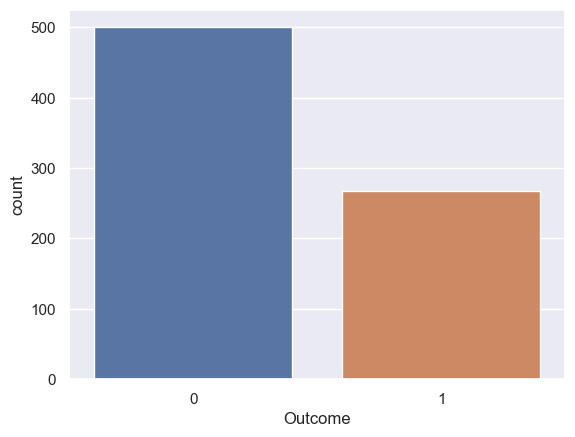

In [9]:
# Use sns countplot to visualize the binary dependent variable 'outcome'
sns.countplot(data=diabetes_df, x='Outcome')
plt.show()

In [10]:
# There seems to be a class imbalance between the ratio of 0 and 1 in the target variable 'Outcome'
outcome_val_perc = diabetes_df['Outcome'].value_counts(normalize=True)*100

print(outcome_val_perc)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64


We can use the correlation matrix to visualize how each predictor variable is linearly related to the outcome variable:

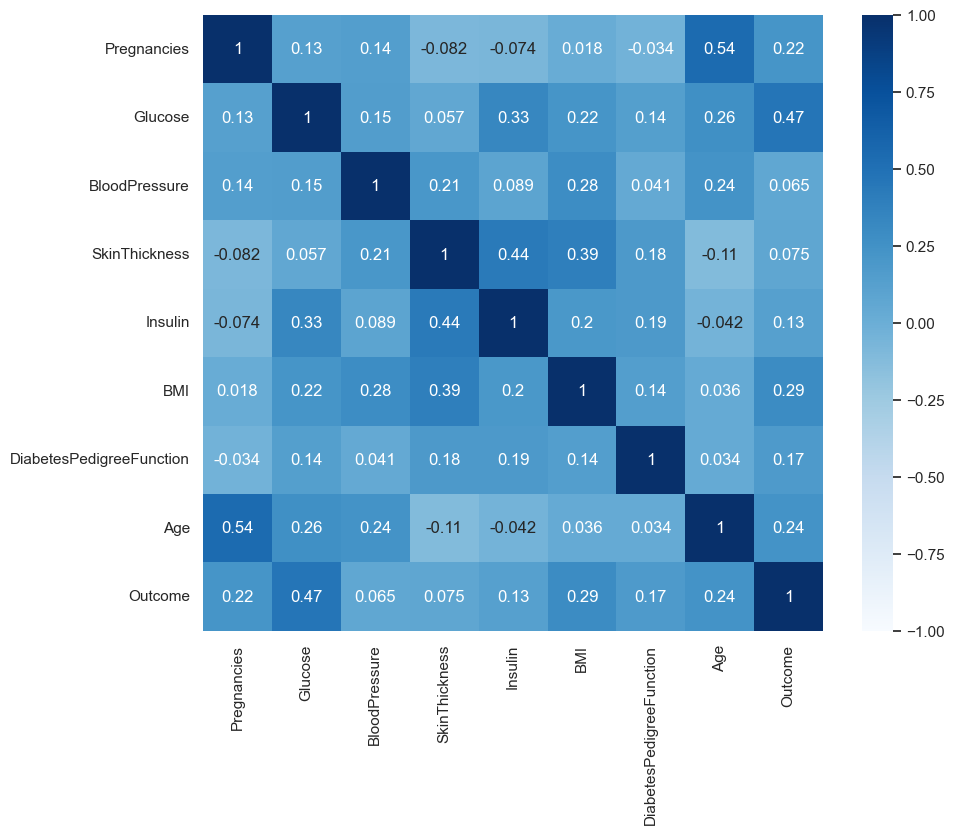

In [11]:
# Use a correlation matrix to check the relationship between the predictor variables and the outcome variable
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(diabetes_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.show()

Some significant observations between 'Outcome' and the predictor variables:

* It seems like there may be a moderate postive linear relationship between 'Glucose' and 'Outcome' (0.47).
* Weak positive correlations between 'BMI, Age, Pregnancies' and 'Outcome', repsectively 0.29, 0.24, 0.22.

### 5. How are the predictor variables related to each other?
### 6. Is there any interaction effect between the predictor variables?

Using the correlation matrix above, there are some significant correlations between the predictors:

* A moderate positive linear correlation between 'Age' and 'Pregnancies' (0.54).
* A moderate positive linear correlation between 'Insulin' and 'SkinThickness' (0.44).
* A weak positive linear correlation between 'SkinThickness' and 'BMI' (0.39).
* A weak positive linear correlation between 'Insulin' and 'Glucose' (0.33).

### 7. What is the average age of the individuals in the dataset?

In [12]:
# Calculate the average age of the individuals in the dataset using the 'Age' column:
avg_age = diabetes_df['Age'].mean()
print(f'Average age of the individuals in the dataset: {avg_age:.0f}')

Average age of the individuals in the dataset: 33


### 8. What is the average glucose level for individuals with diabetes and without diabetes?

In [13]:
# Using the groupby method by 'Outcome' and calculate the average glucose level
avg_glucose = diabetes_df.groupby('Outcome')['Glucose'].mean()
print(f'Average glucose level for individuals without diabetes: {avg_glucose[0]:.3f}')
print(f'Average glucose level for individuals with diabetes: {avg_glucose[1]:.3f}')

Average glucose level for individuals without diabetes: 109.980
Average glucose level for individuals with diabetes: 141.257


### 9.  Are there any differences in the predictor variables between males and females (if gender information is available)?

There's no gender information is available in this dataset, all patients existing are females.

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

-----

### 1. Handling missing values

We found out above that there's no missing values explicitly in the dataset, though the 0 values existing in some columns might deprive from errors or missing data. Let's handle that first.

Recall the zero values take place in the columns of 'Glucose, BloodPressure, SkinThickness, Insulin, BMI'.

In [14]:
# Count the number of zeros in each of the mentioned column
cols_zero_val = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for feature in diabetes_df[cols_zero_val]:
    zero_count_col = (diabetes_df[feature] == 0).sum()
    print('The count of zeros in', feature, 'is:', zero_count_col)

The count of zeros in Glucose is: 5
The count of zeros in BloodPressure is: 35
The count of zeros in SkinThickness is: 227
The count of zeros in Insulin is: 374
The count of zeros in BMI is: 11


In [15]:
# Filter rows where none of the specified columns contain a zero value
no_zero_df = diabetes_df[~(diabetes_df[cols_zero_val] == 0).any(axis=1)]

no_zero_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


Let's perform the Shapiro-Wilk's normality test for all perdictor features whether they are normally distributed.

In [16]:
# Create a function to perform Shapiro-Wilk's normality test to all predictor features
def check_normality(dataframe):
    
    # Exclude the 'Outcome' column
    features = dataframe.columns.drop('Outcome')
    
    # Initialize an empty dictionary to store p-values
    p_values = {}
    
    # Perform Shapiro-Wilk test for each feature
    for feature in features:
        stat, p = shapiro(dataframe[feature])
        p_values[feature] = '%0.30f' % p

    return p_values

# Apply the function 'check_normality' just created to 'no_zero_df'
p_values = check_normality(no_zero_df)

# Check the p values of all the predictor features in 'no_zero_df'
p_values

{'Pregnancies': '0.000000000000000001022580835765',
 'Glucose': '0.000000034419631589344135136344',
 'BloodPressure': '0.008705618791282176971435546875',
 'SkinThickness': '0.001992988632991909980773925781',
 'Insulin': '0.000000000000000000001903519900',
 'BMI': '0.000001656565245866659097373486',
 'DiabetesPedigreeFunction': '0.000000000000000000550217899401',
 'Age': '0.000000000000000000134737718069'}

Since p<<0.05 for these variables, we reject the null hypothesis that the filterd data 'no_zero_df'is normally distributed in either columns. 

We choose to fill in the zero values in Glucose', 'BloodPressure', 'SkinThickness', 'BMI',  'Insulin' with the mean of that column.

In [17]:
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

# Calculate the mean values from 'no_zero_df'
no_zero_means = no_zero_df[cols_to_replace].mean()

# Replace zeros in 'diabetes_df' with the calculated means from 'no_zero_df'
for col in cols_to_replace:
    diabetes_df[col] = diabetes_df[col].replace(0, no_zero_means[col])

In [18]:
# Check again if the zero values issue is fixed in 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin'
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for col in cols_to_check:
    zero_count = (diabetes_df[col] == 0).sum()
    print(f'The count of zeros in {col} is: {zero_count}')

The count of zeros in Glucose is: 0
The count of zeros in BloodPressure is: 0
The count of zeros in SkinThickness is: 0
The count of zeros in BMI is: 0
The count of zeros in Insulin is: 0


In [19]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,156.056122,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,156.056122,26.6,0.351,31,0
2,8,183.0,64.0,29.145408,156.056122,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,156.056122,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.145408,156.056122,30.1,0.349,47,1


### 2. Handling outliers

In the boxplots and the statistics table in Part 1 - EDA, we know that outliers are present at a small level in 'Pregnancies, BloodPressure, SkinThickness, BMI, Age' after treating the zero values. On the other hand, there are extreme outliers in 'Insulin' and 'DiabetesPedigreeFunction' on the higher caps of the distribution.

We'll tackle the outliers issues by using the Quantile Based Flooring and Capping technique from this [source](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/). This way, we're not losing so much data.

In [20]:
# List of columns to replace outliers
cols_to_replace_outliers = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'BMI', 'Age', 'Insulin', 'DiabetesPedigreeFunction']

# Create a function to replace outliers with the tenth_percentile and ninetieth_percentile
def replace_outliers_with_percentiles(dataframe, columns):

    for col in columns:

        # Calculate 10th and 90th percentiles
        tenth_percentile = np.percentile(dataframe[col], 10) 
        ninetieth_percentile = np.percentile(dataframe[col], 90) 

        # Replace values less than the 10th percentile with the 10th percentile value
        np.where(dataframe[col] < tenth_percentile, tenth_percentile, dataframe[col]) 

        # Replace values greater than the 90th percentile with the 90th percentile value
        dataframe.loc[dataframe[col] > ninetieth_percentile, col] = ninetieth_percentile
        
    return dataframe

# Apply the function on the dataframe 'diabetes_df'
diabetes_df = replace_outliers_with_percentiles(diabetes_df, cols_to_replace_outliers)

In [21]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,156.056122,33.6,0.6270,50,1
1,1,85.0,66.0,29.000000,156.056122,26.6,0.3510,31,0
2,8,183.0,64.0,29.145408,156.056122,23.3,0.6720,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.1670,21,0
4,0,137.0,40.0,35.000000,168.000000,41.5,0.8786,33,1
...,...,...,...,...,...,...,...,...,...
763,9,101.0,76.0,40.000000,180.000000,32.9,0.1710,51,0
764,2,122.0,70.0,27.000000,156.056122,36.8,0.3400,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.2450,30,0
766,1,126.0,60.0,29.145408,156.056122,30.1,0.3490,47,1


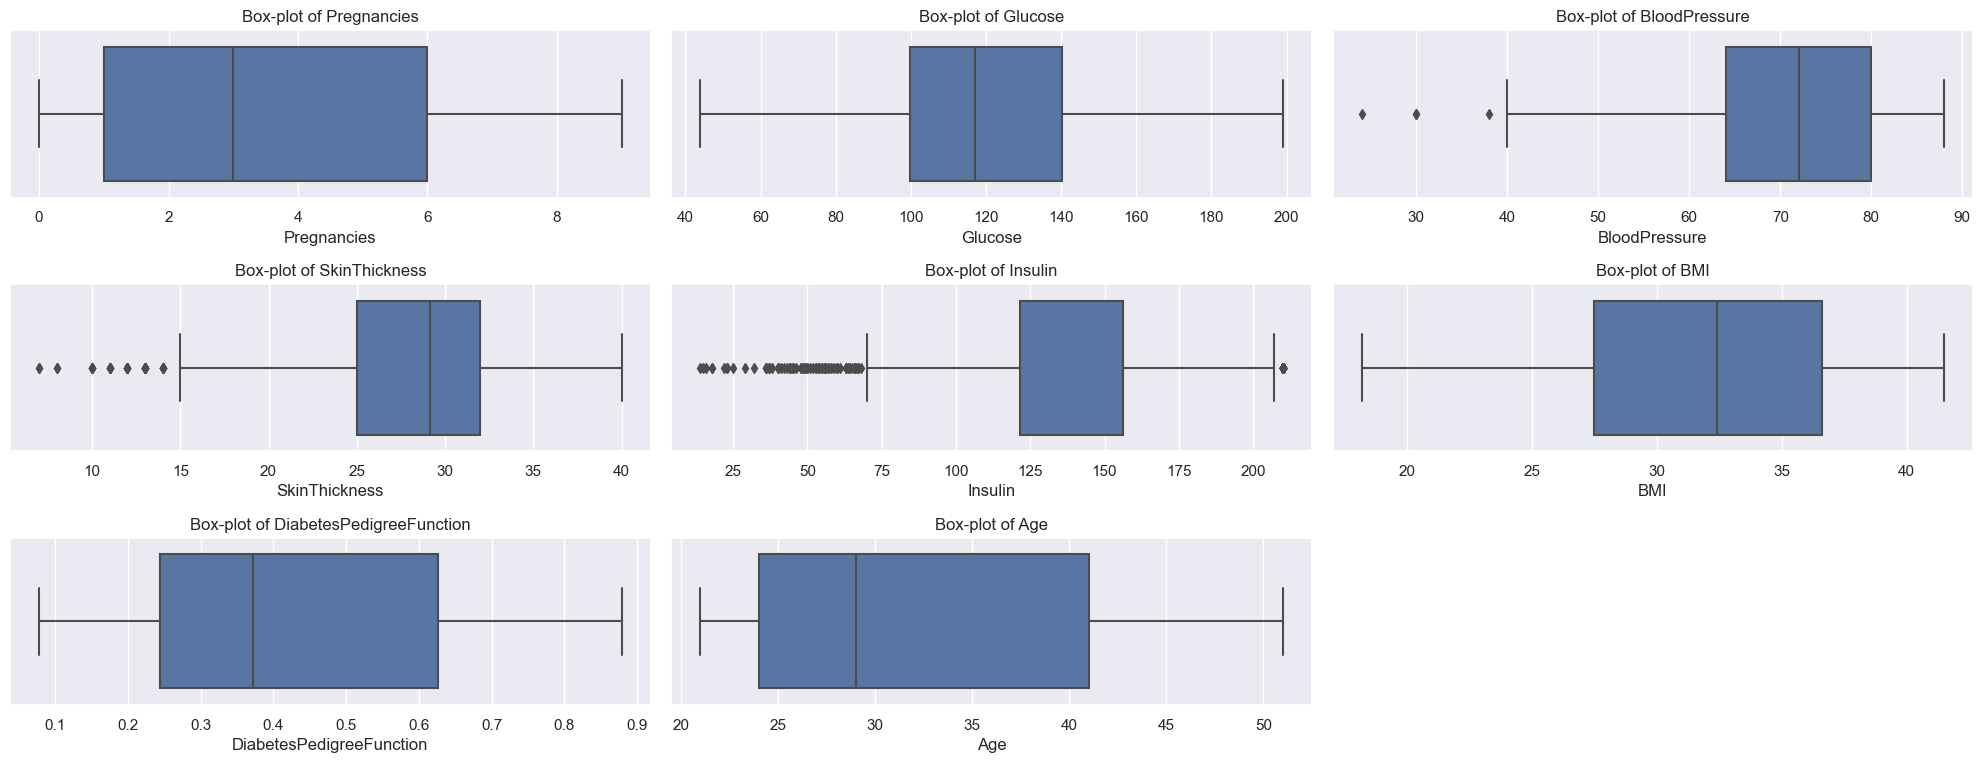

In [22]:
# Plot the boxplots for all columns again, except for 'Outcome', to dectect outliers
def draw_boxplot(dataframe, features, rows, cols):
    
    fig = plt.figure(figsize=(20,20))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        sns.boxplot(data=diabetes_df, x=dataframe[feature])
        ax.set_title('Box-plot of '+ feature)
    
    fig.tight_layout()
    plt.show()

# Exclude the 'Outcome' column from the columns list
draw_boxplot(diabetes_df, diabetes_df.drop(columns=['Outcome']), 8, 3)

We can leave the rest of the outliers for now, especially in 'Insulin' as there are too many of them. The rest of the outliers seem to be okay.

### 3. Dropping duplicates (if any)

In [23]:
# Drop duplicates
diabetes_df = diabetes_df.drop_duplicates()

In [24]:
# Check the number of columns and rows again, no duplicates
diabetes_df.shape

(768, 9)

### 4. Feature Engineering/Selection

If we recall from the Correlation matrix of part 1, below are the features that correlate with each other higher than the rest of the features (the cap is > 0.35):

* A moderate positive linear correlation between 'Age' and 'Pregnancies' (0.54).
* A moderate positive linear correlation between 'Insulin' and 'SkinThickness' (0.44).
* A weak positive linear correlation between 'SkinThickness' and 'BMI' (0.39).

First, we will also use Recursive Feature Elimination (RFE) - a method to select important features by recursively removing the weakest ones to do backward feature elimination to find out the feature_ranking of all predictors.

Also, we can apply the Pearson Correlation under Filter methods here in addition to RFE, to remove features which are highly correlated together. They should be removed because they are redundant, as they can cause multicollinearity and some algorithms don't deal very well with those. Although we're based on the linearity assumption here, the correlation coefficient can be a relatively easy indicator of "amount of information" for dimensionality reduction purpose. The goal is to avoid overfitting due to having too many features. [(Source)](https://datascience.stackexchange.com/questions/63558/should-features-be-correlated-or-uncorrelated-for-features-selection-with-the-he#:~:text=for%20feature%20engineering%20there%20are%20different%20methods.&text=the%20features%20having%20high%20correlation,work%22%20then%20why%20keep%20both.)

In [25]:
# Copy 'diabetes_df' into features and target variables
X = diabetes_df.copy()

# Drop the 'Outcome' column from X
X.drop('Outcome', axis=1, inplace=True)

# Define the target Y as the 'Outcome' column
y = diabetes_df['Outcome']

In [26]:
# Initialize the classifier using LogisticRegression as the base
estimator = LogisticRegression(max_iter=10000) # setting max_iter to ensure convergence

# Initialize RFE
selector = RFE(estimator, n_features_to_select=1, step=1)  # Here n_features_to_select=1 means it will rank all features

# Fit RFE
selector = selector.fit(X, y)

# Print rankings of features
feature_ranking = pd.Series(selector.ranking_, index=X.columns)
print(feature_ranking.sort_values())

DiabetesPedigreeFunction    1
Pregnancies                 2
BMI                         3
Glucose                     4
Age                         5
BloodPressure               6
SkinThickness               7
Insulin                     8
dtype: int32


From all the reasons above, we use dimensionality reduction of space complexity by having a lower number of features.

* 'Pregnancies' ranks #2 whereeas 'Age' ranks #5. Those two variables have a correlation over 0.5. 

   **Action**: We'll keep only 'Pregnancies' in the features and drop 'Age'.

* 'Insulin' and 'SkinThickness' (0.44) has a rather significant correlation with a coefficient of 0.44. In this dataset, 'SkinThickness' is ranked as a more important feature (#7) than 'Insulin' (#8). However, the rankings between the two are not too far off.

  The insulin in blood test is usually among the common tests that have some connection with a more important feature 'Glucose' (aka blood glucose/blood sugar) [(Source)](https://medlineplus.gov/lab-tests/insulin-in-blood/#:~:text=An%20insulin%20in%20blood%20test%20may%20be%20used%20with%20other,Diagnose%20insulin%20resistance.).

  Our research shows that 'SkinThickness' can be investigated through the effects of age, sex, BMI in children and adults with diabetes [(Source)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0086637). Those are the features that are already ranked highly in our RFE ranking results.

  **Action**: Thus, we decide to keep 'Insulin' while removing 'SkinThickness' from the features.


In [27]:
# Drop the 'Age', 'SkinThickness' from our features
X.drop(['Age', 'SkinThickness'], axis=1, inplace=True)

### 5. Features transformation

From the histograms of all variables from part 1, the features with highly skewed data include: 'Pregnancies, Insulin, DiabetesPedigreeFunction, Age'. We will apply the logarithmic transformation for such columns.

In [28]:
# Log transformation on 'Pregnancies'
diabetes_df['Pregnancies_log'] = diabetes_df ['Pregnancies'].apply(np.log)

In [29]:
# Log transformation on 'Insulin'
diabetes_df['Insulin_log'] = diabetes_df['Insulin'].apply(np.log)

In [30]:
# Log transformation on 'DiabetesPedigreeFunction'
diabetes_df['DiabetesPedigreeFunction_log'] = diabetes_df['DiabetesPedigreeFunction'].apply(np.log)

In [31]:
# Log transformation on 'Age'
diabetes_df['Age_log'] = diabetes_df['Age'].apply(np.log)

### 6. Splitting the data and Scaling

In [32]:
# Split data into training and test set with 80% training, 20% testing
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Use StandardScaler from sklearn to scale the data as some features are widely spread from the mean

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the X_train data
X_train_scaled = scaler.fit_transform(X_train) 
X_scaled = StandardScaler().fit_transform(X)

In [34]:
# Create a dataframe for the X_train scaled data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Statistical summary for 'X_train_scaled_df'
X_train_scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,7.232723e-17,-4.628943e-17,-3.544034e-16,-4.064790e-16,2.979882e-16,-1.620130e-16
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.214833e+00,-2.588428e+00,-4.341634e+00,-2.841834e+00,-2.293113e+00,-1.496530e+00
25%,-8.757839e-01,-7.265758e-01,-6.942651e-01,-5.656125e-01,-7.678700e-01,-8.090615e-01
50%,-1.976864e-01,-1.281235e-01,3.520864e-02,3.282757e-01,1.355614e-02,-2.582455e-01
75%,8.194599e-01,5.700709e-01,7.646824e-01,3.282757e-01,7.448373e-01,7.561391e-01
max,1.836606e+00,2.564912e+00,1.494156e+00,1.532082e+00,1.601481e+00,1.869755e+00


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

-----

For binary classification, when the dataset is smaller and has many features: We can use Logistic Regression, Decision Trees and Random Forest models. Reference from this [link](https://www.kaggle.com/code/ahsanzafarmehmood/diabetes-prediciton).

### Apply 5-fold cross-validation, compute average scores to find the best 2 models

In [35]:
# Initialize the models we want with default parameters
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Apply 5-fold cross-validation and compute average scores
mean_scores = {name: np.mean(cross_val_score(model, X_train, y_train, cv=5)) for name, model in models.items()}

In [36]:
# View the mean_scores of our 3 models
mean_scores

{'Logistic Regression': 0.7622284419565508,
 'Decision Tree': 0.7003731840597094,
 'Random Forest': 0.742756230840997}

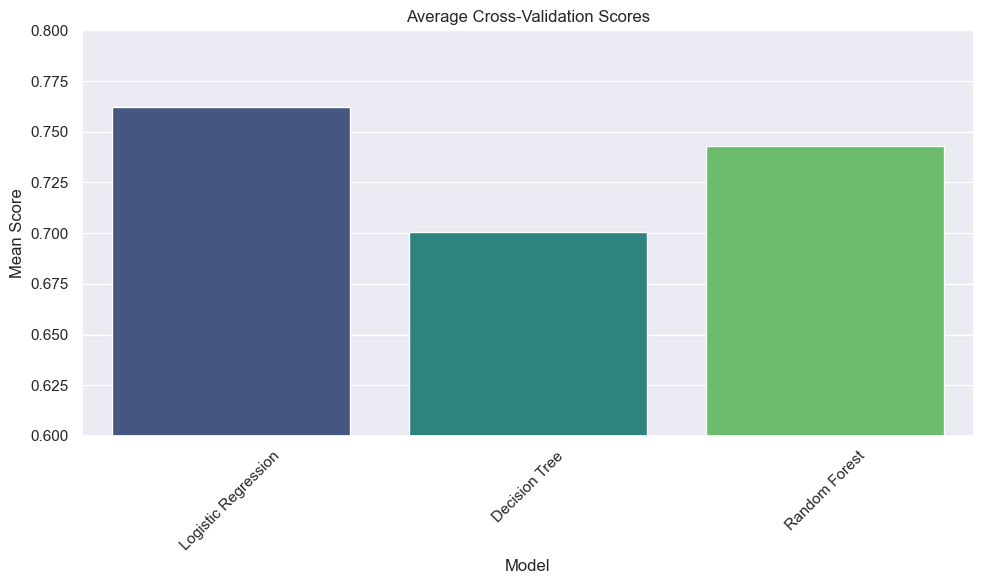

In [37]:
# Extract model names and scores
model_names = list(mean_scores.keys())
scores = list(mean_scores.values())

# Bar plot for model names and scores
plt.figure(figsize=(10,6))
sns.barplot(x=model_names, y=scores, palette="viridis")

# Title and labels
plt.title('Average Cross-Validation Scores')
plt.ylabel('Mean Score')
plt.xlabel('Model')
plt.ylim(0.6, 0.8)
plt.xticks(rotation=45)  # Rotate model names for better readability

plt.tight_layout()
plt.show()

**Conclusion**: Logistic regression and Random Forest seem to perform much better than Decision Tree with our diabetes prediction dataset. We won't explore further the Decision Tree model.

### 1. Logistic Regression Model

One of the downsides of using Logistic Regression Model is that our target variable is very imbalanced as seen in part 1. Thus, when using Logistic Regression, accuracy is not the best metric to use when evaluating imbalanced datasets. We can focus on changingg the performance metrics by using: Confusion Matrix, Precision, Recall, F1: Score and AUC. [Source](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/).

In [38]:
# Logistic regression
clf = LogisticRegression()

# fitting the data
clf.fit(X, y)

LogisticRegression()

#### Evaluate the Logistic Regression Model:

In [39]:
test_prob_clf = clf.predict_proba(X_test)[:, 1]
test_pred_clf = clf.predict(X_test)

In [40]:
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob_clf)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob_clf)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred_clf)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred_clf)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred_clf)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred_clf)))

print('\nClassification Report')
print(classification_report(y_test, test_pred_clf))

AUC = 0.85032
Average Precision = 0.76995

Using 0.5 as threshold:
Accuracy = 0.78571
Precision = 0.72917
Recall = 0.63636
F1 score = 0.67961

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



Confusion Matrix - Logistic Regression


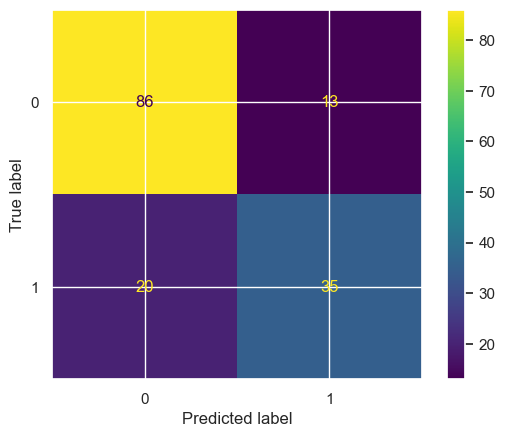

In [41]:
# Print and visualize the confusion matrix for Logistic Regression
print('Confusion Matrix - Logistic Regression')
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

#### Key intepretation of the results of the Logistic Regression Model:

As said, we will focus on the Precision metrics rather than 'Accuracy' for an imbalanced dataset. "Precision tells us how many of the correctly predicted cases actually turned out to be positive", whereas "Recall tells us how many of the actual positive cases we were able to predict correctly with our model" [(Source)](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/).

* Precision = 0.72917, Recall = 0.63636 : 72.91% percent of the correctly predicted diabete case turned out to be truly individuals having diabetes. 63.64% of the positives were successfully predicted by our model. This Logistic Regression model seems to be a good one.
* F1-score which is a "harmonic mean of Precision and Recall" isn't bad as well at 67.96%.

In [42]:
# Interpret the equation of our Logistics Regression model
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + list(X.columns), 'coefficient': coefficients})

,variable,coefficient
0,intercept,-9.716590
1,Pregnancies,0.161554
2,Glucose,0.035822
3,BloodPressure,-0.005910
4,Insulin,0.003201
5,BMI,0.104120
6,DiabetesPedigreeFunction,1.176893


### 2. Random Forest Classifier Model

For imbalanced datasets, tree-based algorithms often perform well on them. Random forest is a supervised learning algorithm. It is one of the most flexible and easy to use algorithm which can be very accurate and robust model because it uses large number of decision-trees to make predictions.

#### Try Random Forest Classifier model with c:

In [43]:
# Instantiate the classifier with n_estimators=100
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [44]:
test_prob_rfc = rfc.predict_proba(X_test)[:, 1]
test_pred_rfc = rfc.predict(X_test)

#### Evaluate the Random Forest Classifier model with n_estimators=100:

In [45]:
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob_rfc)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob_rfc)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred_rfc)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred_rfc)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred_rfc)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred_rfc)))

print('\nClassification Report')
print(classification_report(y_test, test_pred_rfc))

AUC = 0.83581
Average Precision = 0.74406

Using 0.5 as threshold:
Accuracy = 0.75974
Precision = 0.66071
Recall = 0.67273
F1 score = 0.66667

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



Confusion Matrix - Random Forest Classifier


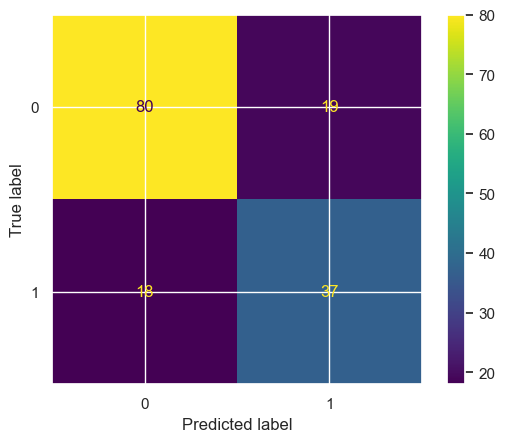

In [46]:
# Print and visualize the confusion matrix for Random Forest Classifier model with n_estimators=100
print('Confusion Matrix - Random Forest Classifier')
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

#### Key intepretation of the results of the Random Forest Classifier Model:

* Precision = 0.66071, Recall = 0.67273: 66.07% percent of the correctly predicted diabete case turned out to be truly individuals having diabetes. 67.27% of the positives were successfully predicted by our model. This Random Forest Classifier Model doesn't perform as well as the Logistic Regression model we had before.
* F1-score which is a "harmonic mean of Precision and Recall" isn't bad at 66.67%.

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

----

**Conclusion from the exploratory data analysis (EDA) conducted**:

* Note that all patients here are females at least 21 years old of Pima Indian heritage. The average age of the individuals in the dataset is 33 years old.

* There is a moderate postive linear relationship between 'Glucose' and 'Outcome' (0.47). Higher glucose levels might be associated with a higher likelihood of the individual having diabetes (the outcome being 1). There is also a weak positive correlations between 'BMI, Age, Pregnancies' and 'Outcome'(repsectively 0.29, 0.24, 0.2). As BMI increases or older ages or having more pregnancies, the likelihood of having diabetes (the outcome being 1) might also increase. 

* Some medical measurements in this dataset are not independent and there are correlations between them. There's a moderate positive linear correlation between 'Age' and 'Pregnancies' (0.54); indicating that as age increases, the number of pregnancies might also increase. A moderate positive linear correlation between 'Insulin' and 'SkinThickness' (0.44) indicates as the Insulin level increases, the thickness of the skin might also increase. Despite being a slight likelihood: people with higher BMI might tend to have thicker skin (correlation between 'SkinThickness' and 'BMI' is 0.39), while higher glucose levels might be associated with higher insulin levels (correlation between 'Insulin' and 'Glucose' is 0.33.

* Glucose is a rather important determiner in predicting whether the patient is having diabetes or not (feature_rank #4 by using RFE with LogisticRegression as the base). The average glucose level for individuals without diabetes is 109.980, whereas the Average glucose level for individuals with diabetes is 141.257.

**Conclusion from the the machine learning models developed**:

* Our task is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset which us a binary classification task. We tried to apply 5-fold cross-validation and compute average scores to find the better performing machine learning algorithms among: Logistic Regression, Decision Trees and Random Forest. The result indicates that Logistic regression and Random Forest seem to perform much better.

* This is an imbalanced dataset wherein the target variable to predict diabetes has more patients samples not having diabetes (much more 0 values compared to 1 values in the 'Outcome' target variable). To combat that, we know Accuracy score won't work well in evaluating the model performance, and therefore prefer to use Precision and Recall to perform model evaluation comparison. At the end, the Logistic Regression Model is the best performing with 72.91% of the correctly predicted diabete cases turned out to be truly women over 21 from the Pima Indian tribes having diabetes. 63.64% of those positive predictions were successfully predicted by our model.